https://ocefpaf.github.io/python4oceanographers/blog/2014/12/01/PCA/

In [1]:
import pandas as pd


df = pd.read_csv("RGB_values.csv")
df = df.rename(columns={"Unnamed: 0": "names"})
df

,names,R,G,B
0,cl1_p12_lagoinha_deixa1_g0005,208,227,254
1,cl1_p4_brava_deixa3_a0009,204,196,152
2,cl1_p2_joaq_dunaiii_g0003,179,178,130
3,cl1_p4_brava_deixa4_d0009,186,167,6
4,cl1_p12_moca1_limsup5_f0011op2,171,174,182
...,...,...,...,...
211,cl1_p2_joaq_dunaiii_h0010,231,167,2
212,cl1_p4_brava_deixa4_e0003,170,144,5
213,cl1_p1_psul_deixa4_h0007,127,143,98
214,cl1_p3_joaq_dunaiii_a0007,247,226,3


In [2]:
def z_score(x):
    """Remove a média e normaliza os pelo desvio padrão"""
    return (x - x.mean()) / x.std()

RGB = df[["R", "G", "B"]]
zs = RGB.apply(z_score).T
zs

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
R,1.091318,0.964430,0.171386,0.393438,-0.082389,0.203108,0.520325,-0.875433,1.471979,-0.970599,...,0.329995,0.678934,0.583769,-0.177554,-0.272719,1.820919,-0.114110,-1.478147,2.328467,0.076220
G,1.783521,0.801411,0.231154,-0.117337,0.104430,0.231154,0.136111,-1.416256,1.308306,-0.750956,...,0.484601,1.118220,-0.180699,-1.067766,-0.053975,-0.117337,-0.845999,-0.877680,1.751840,0.199473
B,1.828113,0.337312,0.015766,-1.796581,0.775783,-0.115775,-0.422705,-1.738119,0.001150,0.512700,...,0.571163,1.784266,-1.855044,-1.855044,0.790398,-1.855044,-1.811197,-0.451937,-1.840428,0.483469


In [3]:
from sklearn.decomposition import PCA


pca = PCA(n_components=None)
pca.fit(zs);

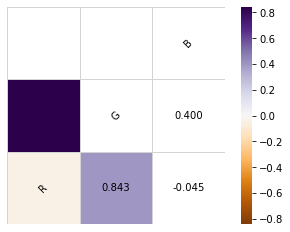

In [4]:
import numpy as np
import seaborn
import matplotlib.pyplot as plt


corr = RGB.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
seaborn.heatmap(
    corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
    square=True, linecolor="lightgray", linewidths=1, ax=ax)

for k in range(len(corr)):
    ax.text(k+0.5,len(corr)-(k+0.5), corr.columns[k], 
            ha="center", va="center", rotation=45)
    for j in range(k+1, len(corr)):
        s = "{:.3f}".format(corr.values[k, j])
        ax.text(
            j+0.5,len(corr)-(k+0.5), s,
            ha="center", va="center")
ax.axis("off");

In [5]:
loadings = pd.DataFrame(pca.components_.T)
loadings.index = ["PC %s" % pc for pc in loadings.index + 1]
loadings.columns = ["TS %s" % pc for pc in loadings.columns + 1]
loadings

,TS 1,TS 2,TS 3
PC 1,0.028113,0.089641,-0.832923
PC 2,-0.029744,0.000937,0.089522
PC 3,-0.008749,0.018397,0.010937
PC 4,-0.104669,0.013878,-0.002231
PC 5,0.041197,-0.007855,0.023724
...,...,...,...
PC 212,-0.160936,-0.172611,0.006264
PC 213,-0.076523,-0.050157,0.001402
PC 214,0.044118,0.058947,0.043296
PC 215,-0.204646,0.098132,-0.055431


In [6]:
PCs = np.dot(loadings.values.T, RGB)

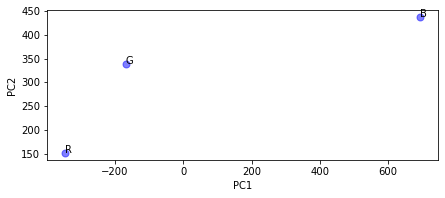

In [7]:
line = {"linewidth": 1, "linestyle": "--", "color": "k"}
marker = {"linestyle": "none", "marker": "o", "markersize": 7, "color": "blue", "alpha": 0.5}


fig, ax = plt.subplots(figsize=(7, 2.75))
ax.plot(PCs[0], PCs[1], label="Scores", **marker)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

text = [
    ax.text(x, y, t) for x, y, t in
    zip(PCs[0], PCs[1]+0.5, RGB.columns)
]

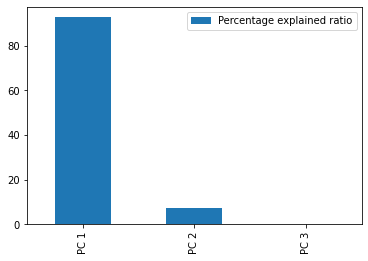

In [8]:
perc = pca.explained_variance_ratio_ * 100

perc = pd.DataFrame(perc, columns=["Percentage explained ratio"], index=["PC %s" % pc for pc in np.arange(len(perc)) + 1])
ax = perc.plot(kind="bar")

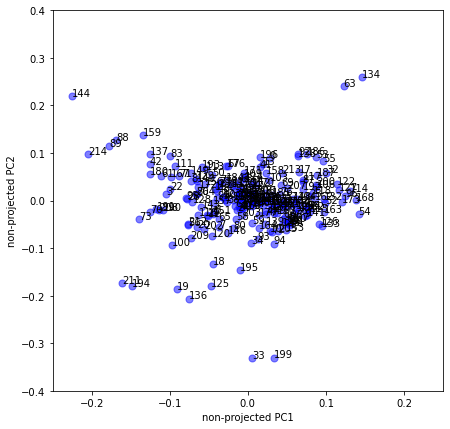

In [9]:
marker = {"linestyle": "none", "marker": "o", "markersize": 7, "color": "blue", "alpha": 0.5}

fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(loadings.iloc[:, 0], loadings.iloc[:, 1], label="Loadings", **marker)
ax.set_xlabel("non-projected PC1")
ax.set_ylabel("non-projected PC2")
ax.axis([-1, 1, -1, 1])
text = [
    ax.text(x, y, t) for
    x, y, t in zip(loadings.iloc[:, 0], loadings.iloc[:, 1], RGB.index)]

ax.axis([-0.25, 0.25, -0.4, 0.4]);